Introduction to Artificial Intelligence - Lab Session 1 - 
--
At the end of this session, you will be able to : 
- Create and manage the Jupyter Notebooks environment to run code, insert text and math equations.
- Perform basic matrix manipulations using Numpy. 
- Create signals and perform basic scientific computing using Scipy and Numpy.
- Use the pyrat software to generate custom datasets and save it into numpy
- Produce simple data visulisation using Matplotlib.

Part 1 - Intro to Jupyter Notebook
--
Here, we will only cover the basics. 

Jupyter Notebook is based on the .ipynb format (iPython Notebook), and is essentially a way to do rapid prototyping / demonstrations of scientific python. The basic idea is to define *cells*. 
Cells can be of several types, including python code, or rich text (using [markdown formatting](https://www.markdownguide.org/basic-syntax/)).

When a code cell is evaluated (i.e. the python code will be executed), the output of this evaluation will show up right below the cell. 

When a text cell is evaluated, the text will be formatted. 

You can now do the "User Interface Tour" from the Help menu. 

Done ? 

When working with Jupyter Notebook, you will essentially switch between two modes : 
- The Edit mode in which you edit the content of the cells 
- The Command mode, that enables you to change the cell types. 

When in Command mode, you can select cells. If you select a single cell, you can edit it by simply pressing enter, or double clicking on it. 

For example, try editing THIS CELL and change its content. (edited by GS)

Now, edit the cell below, change the code, and when you're done, press Shift+Enter to evalute the code. 

In [3]:
### CELL TO BE EDITED

a=320
b= 2*a      
print("%d + %d"%(a,b))

320 + 640


Text cells can contain math expressions that use the Markdown formatting, in which you can use LaTEx expressions for maths (enclosed between two dollar signs). 

For example : $A(k) \triangleq \sum_{\mathbf{n} =1}^{k}{n^2}$

Now : 
- Edit the current cell to show the code that displays the math expression,
- Create a code cell below that defines a function that calculates $A(k)$ given k, and evaluate this cell,
- Create another cell and use the function to display $A(k)$ for a few values of $\mathbf{k}$ (eg 10 and 20).

In [4]:
### CELL TO BE COMPLETED 
def a(k):
    "commentaire"
    return k * (k + 1) * (2 * k + 1) / 6 
    

In [5]:
### CELL TO BE COMPLETED 
print(a(10))
print(a(20))

385.0
2870.0


Note that using Jupyter Notebook, if you evaluate a cell with a function followed by a "?" sign, the help of the function will pop up. 

Example : 

In [6]:
import os

os.listdir?

Signature: os.listdir(path=None)
Docstring:
Return a list containing the names of the files in the directory.

path can be specified as either str, bytes, or a path-like object.  If path is bytes,
  the filenames returned will also be bytes; in all other circumstances
  the filenames returned will be str.
If path is None, uses the path='.'.
On some platforms, path may also be specified as an open file descriptor;\
  the file descriptor must refer to a directory.
  If this functionality is unavailable, using it raises NotImplementedError.

The list is in arbitrary order.  It does not include the special
entries '.' and '..' even if they are present in the directory.
Type:      builtin_function_or_method

Signature: os.listdir(path=None)
Docstring:
Return a list containing the names of the files in the directory.

path can be specified as either str, bytes, or a path-like object.  If path is bytes,
  the filenames returned will also be bytes; in all other circumstances
  the filenames returned will be str.
If path is None, uses the path='.'.
On some platforms, path may also be specified as an open file descriptor;\
  the file descriptor must refer to a directory.
  If this functionality is unavailable, using it raises NotImplementedError.

The list is in arbitrary order.  It does not include the special
entries '.' and '..' even if they are present in the directory.
Type:      builtin_function_or_method

You can also display the code of a function using the syntax "??" 

In [7]:
A??

Object `A` not found.


The popup can be closed by pressing the Escape key. 

Use the listdir function to browse the content of some directories... 


In [14]:
### CELL TO BE COMPLETED 

directory = r"../../../pyrat_workspace/programs"
os.listdir(directory)

['random_1.py',
 'random_2.py',
 'random_3.py',
 'template.py',
 'template_2players.py',
 'tutorial.py']

Part 2 - Introduction to Numpy, Scipy and Matplotlib 
--

A code cell can contain any python code, including imports. Let's start by importing the Numpy package. 

In [50]:
import numpy as np

Numpy can be used to generate pseudo-random values from various distributions. In particular, a very useful distribution is the standard normal (zero mean and unit variance). Let's generate two vectors sampled from the normal distribution, using a length parameter that we'll be able to change if needed. 

In [51]:
length = 50

vecA = np.random.randn(length)
vecB = np.random.randn(2*length)

vecA and vecB are numpy *arrays*. One of their attributes can be fetched to check their *shape*

In [19]:
print(vecA.shape)
print(vecB.shape)

(50,)
(100,)


In [20]:
print(vecA)

[ 0.31649264 -0.17984438  0.49408144  0.76195041  1.69074986  0.28476811
 -0.77619546  0.65767272  1.57021825 -0.64996948  1.10015616  2.08236231
  0.97586367  0.44887997 -0.09871351  0.83665565  1.35750651 -0.42993467
 -0.41792447  1.25000719  0.17421583  0.54206359  0.18806927  1.02590909
  0.86066653  0.49150176 -0.42598492 -0.9714961  -1.52803095  0.62423104
  0.61368851  0.23298664 -0.23743146 -2.89210428  1.61919468 -1.16288787
  0.30231493 -0.54654158 -0.1735304   1.26624634 -1.97546511  0.94353389
  1.72714385 -0.75190622 -2.75003879 -0.23158978 -0.84853639 -0.52263086
  1.50627005  0.23515253]


Numpy arrays can be vectors as well as matrices, or any tensor. For example the following code will create tensors with 3 dimensions using the standard normal

In [21]:
arrayC = np.random.randn(3,500,4)
print(arrayC.shape)

(3, 500, 4)


Note that the random package of Numpy has several other interesting functions. Try to test the two functions proposed in the cell below. 

Try uncommenting the two functions below one by one, look up their help page, and try to use them. 

In [58]:
### CELL TO BE Edited 

testRandint = np.random.randint(3,size=10)
print (testRandint)
testPermutation = np.random.permutation(testRandint)
print (testPermutation)

[0 1 1 1 2 2 1 0 1 0]
[1 1 1 0 1 1 0 0 2 2]


A very important features of arrays is the fact they can be used as *iterables*. For example, you can iterate over the dimensions of an array by simply "looping" over it using a *for* loop

In [23]:
for curdim in arrayC:
    print(curdim.shape)

(500, 4)
(500, 4)
(500, 4)


Also possible to enumerate along the dimension in order to get the index of the current "smaller" array


In [24]:
print('Initial shape is %d %d %d' % (arrayC.shape[0],arrayC.shape[1],arrayC.shape[2]))
print('Iterating over the first dimension using an index k')
for k,curdim in enumerate(arrayC):
    print('k = %d, shape is %d %d' % (k,curdim.shape[0],curdim.shape[1]))

Initial shape is 3 500 4
Iterating over the first dimension using an index k
k = 0, shape is 500 4
k = 1, shape is 500 4
k = 2, shape is 500 4


Use the previous principle in order to calculate the average of each 500x4 subvector, using the function np.mean()

In [73]:
### CELL TO BE COMPLETED 
averages = np.empty(arrayC.shape[0])

for k, curdim in enumerate(arrayC):
    averages[k] = np.mean(curdim)

print("Averages of each 500x4 subvector: ", averages)

Averages of each 500x4 subvector:  [0.0254328  0.0284864  0.02962074]


Check that you obtain the same result when directly computing the average over the two axis 1 and 2 (look up the arguments of np.mean) 

In [77]:
### CELL TO BE COMPLETED 
averages_direct = np.mean(arrayC, axis=(1, 2))

print("Averages calculated directly over axes 1 and 2: ", averages_direct)

Averages calculated directly over axes 1 and 2:  [0.0254328  0.0284864  0.02962074]


These features will prove to be very useful when manipulate large arrays. 

Another important operation when working with Numpy Arrays is *reshaping*. Essentially, *reshaping* consists in changing the organisation of the array (in terms of dimension), while keeping the same number of elements. For example, a 20x10 2D array can be converted into a 4x5x10 array

In [27]:
A = np.random.randint(1,5,(10,20))
print('Initial shape of A is %d x %d' % (A.shape[0],A.shape[1]))
print(A)
B = A.reshape((4,5,10))
print('B is A reshaped to %d x %d x %d' % (B.shape[0],B.shape[1],B.shape[2]))
print(B)

Initial shape of A is 10 x 20
[[4 2 4 4 2 4 4 4 4 4 2 3 3 4 3 3 1 4 3 2]
 [2 4 4 4 4 4 3 1 3 4 2 2 4 3 4 3 3 3 3 3]
 [1 1 4 3 4 2 2 1 4 2 1 2 4 1 4 1 1 3 3 3]
 [2 3 1 1 4 2 4 4 1 1 2 2 1 4 4 3 3 1 3 2]
 [4 3 4 1 1 1 1 3 4 2 3 3 1 2 4 2 4 2 4 2]
 [4 4 2 2 3 1 2 4 3 3 3 2 3 3 1 2 3 1 2 4]
 [4 1 2 2 2 1 4 2 1 3 2 4 3 4 2 3 1 3 2 1]
 [3 3 2 2 3 4 3 3 3 1 1 4 3 2 3 4 1 1 1 3]
 [4 2 4 1 3 4 4 1 3 3 1 1 2 1 4 2 2 3 1 3]
 [4 1 3 2 3 3 2 1 1 4 3 2 1 4 2 2 1 1 1 1]]
B is A reshaped to 4 x 5 x 10
[[[4 2 4 4 2 4 4 4 4 4]
  [2 3 3 4 3 3 1 4 3 2]
  [2 4 4 4 4 4 3 1 3 4]
  [2 2 4 3 4 3 3 3 3 3]
  [1 1 4 3 4 2 2 1 4 2]]

 [[1 2 4 1 4 1 1 3 3 3]
  [2 3 1 1 4 2 4 4 1 1]
  [2 2 1 4 4 3 3 1 3 2]
  [4 3 4 1 1 1 1 3 4 2]
  [3 3 1 2 4 2 4 2 4 2]]

 [[4 4 2 2 3 1 2 4 3 3]
  [3 2 3 3 1 2 3 1 2 4]
  [4 1 2 2 2 1 4 2 1 3]
  [2 4 3 4 2 3 1 3 2 1]
  [3 3 2 2 3 4 3 3 3 1]]

 [[1 4 3 2 3 4 1 1 1 3]
  [4 2 4 1 3 4 4 1 3 3]
  [1 1 2 1 4 2 2 3 1 3]
  [4 1 3 2 3 3 2 1 1 4]
  [3 2 1 4 2 2 1 1 1 1]]]


Now try implementing the same function $A(k)$ that we implemented in part 1 using numpy.

Recall that $A(k) \triangleq \sum_{\mathbf{n} =1}^{k}{n^2}$

The following numpy auxiliary functions can help you:
   - power: (np.power(base,exponent), example: np.power(2,2) = 4
   - arange: (np.arange(last element), example: np.arange(5) = [0,1,2,3,4]
   - sum: (np.sum(vector), example: np.sum([0,1,2,3]) = 6

In [81]:
### CELL TO BE COMPLETED 
def a(k):
    return np.sum(np.power(np.arange(k+1),2))

a(20)

2870

One property of numpy that is really important is broadcasting. The goal of broadcasting is to simplify the vectorization of certain operations when the vectors do not have the same shape. For example you can easily perform element-wise multiplication.

To test this try doing an element-wise multiplication of the vector x and matrix y below

In [82]:
x = np.array([2,3])
y = np.array([[4,1],[9,10],[12,13]])
result = x*y
print("X: ",x)
print("Y: ")
print(y)
print("X shape is: ",x.shape)
print("Y shape is: ",y.shape)
print("Element-wise multiplication shape:", result.shape)
print("Element-wise multiplication result:")
print(result)


X:  [2 3]
Y: 
[[ 4  1]
 [ 9 10]
 [12 13]]
X shape is:  (2,)
Y shape is:  (3, 2)
Element-wise multiplication shape: (3, 2)
Element-wise multiplication result:
[[ 8  3]
 [18 30]
 [24 39]]


Another very powerful tool in numpy is indexing. You can use either an integer vector or a boolean vector to choose which indexes you want to extract from your numpy tensor.

Consider that we want to extract all elements from the first line of your vector y that have a higher value than 1, you would have to do:

In [83]:
first_row = y[0]
first_row_higher_than_one = first_row > 1
print("Result: ", first_row[first_row_higher_than_one])

Result:  [4]


You can also choose specific lines to query, for example if you want to query lines 0 and 2

In [85]:
rows = [0,2]
rows_result = y[rows]
values_higher_than_one = rows_result > 1
print("Result: ", rows_result[values_higher_than_one])

Result:  [ 4 12 13]


You can also save and load your numpy tensors using np.savez and np.load. This will be really important in the next courses as this enable you to generate your data only once instead of having to do all the calculations every time you need your data.

In [32]:
filename = "x.npz"
source_tensor = x
np.savez(filename,data=source_tensor)

In [86]:
loaded_npz = np.load(filename)
loaded_tensor = loaded_npz["data"]
print("Your tensor was loaded and contains: ", loaded_tensor)

Your tensor was loaded and contains:  [2 3]


Part 3 - Setup of the pyrat software and generating games
--


If you have not done so already, you need the latest version of PyRat. To obtain it, open a terminal and run:

`python -m pip install --user git+https://github.com/BastienPasdeloup/PyRat.git`

A complete guide is available at https://formations.imt-atlantique.fr/pyrat/install/

In [34]:
### TO DO: open a terminal tab / window and clone the repo.

In [35]:
!pip list

Package                       Version
----------------------------- ---------------
aiobotocore                   2.4.2
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.0
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8

Now, you may import PyRat.

In [36]:
import sys     # These lines correct a bug occuring in Notebooks.
sys.argv=['']  # It's not perfect, but it works.

import os
lab_commons_path = os.path.join(os.getcwd(), "..", "..")
if lab_commons_path not in sys.path:
    sys.path.append(lab_commons_path)

from pyrat import *

In the context of the AI course, we are going to simplify the rules of PyRat a bit.
In fact, we are going to remove all walls and mud penalties. Also, we are not going to consider symmetric mazes anymore. This has already been prepared in this class.

Below, you will find a function which simulates a game between two players `program_1` and `program_2`, and returns the initial locations of cheeses (initial condition) and the winner (1 for `program_1` and -1 `program_2`).

In [88]:
import lab_commons.make_2_player_matches as simulations
import lab_commons.AI.greedy as greedy_player
import lab_commons.AI.random as random_player
import lab_commons.AI.second_greedy as second_greedy_player

program_1 = greedy_player 
program_2 = second_greedy_player # You may want to test with the random player.

_, cheeses_locations, winner = simulations.run_one_game(program_1, program_2, gui = True)
print(f"Cheeses locations: {cheeses_locations},\nWinner (1 for `program_1` and -1 `program_2`, 0 for a draw): {winner}")

Cheeses locations: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.],
Winner (1 for `program_1` and -1 `program_2`, 0 for a draw): 1.0


You can additionally modify the size of the maze and the number of cheeses to catch on the maze.

In [89]:
nb_cheese = 4
maze_width = 4
maze_height = 5

_, cheeses_locations, winner = simulations.run_one_game(program_1, program_2, nb_cheese = nb_cheese,
                                                     maze_width = maze_width, maze_height = maze_height, gui = True)
print(f"Cheeses locations: {cheeses_locations},\nWinner (1 for `program_1` and -1 `program_2`, 0 for a draw): {winner}")

Cheeses locations: [0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.],
Winner (1 for `program_1` and -1 `program_2`, 0 for a draw): -1.0


Finally, you can run several games with the following function, by specifying the number of desired games with `nb_games`. The function returns the initial locations of all cheeses for all games, and the winner for each game. We encourage you to turn off the user interface when runninng several games (setting `gui` to False, which is the default value).

In [90]:
nb_games = 10

_, cheeses_10_games, winners_10_games = simulations.run_several_games(program_1, program_2, nb_cheese = nb_cheese,
                                                                  maze_width = maze_width, maze_height = maze_height, 
                                                                  nb_games = nb_games)

print(f"Cheeses matrix: {cheeses_10_games},\nWinners: {winners_10_games}")

Cheeses matrix: [array([0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.]), array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0.]), array([0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 0., 0.]), array([0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0.]), array([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0.]), array([0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0.]), array([0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       1., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       1., 0., 0.]), array([0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0.])],
Winners: [-1.0, 1.0, 0

Part 4 - Visualizing PyRat Datasets
--

We've already run 500 games for you, with 4 cheeses and a maze of size 5 x 7. You can load the results in the following cell.

X and Y respectively represent the cheeses position and the winner, for each game.

In [94]:
cheeses_npz = np.load("cheeses_500_games_5x7_4.npz")
X = cheeses_npz["data"]

winners_npz = np.load("winners_500_games_5x7_4.npz")
Y = winners_npz["data"]
print(f"Shape of X matrix: {X.shape},\nY matrix: {Y}")

Shape of X matrix: (500, 35),
Y matrix: [ 0.  0.  0. -1. -1.  0.  0.  1.  0.  1.  1.  1.  0.  0.  1.  0. -1.  0.
 -1. -1.  1.  0. -1. -1.  0.  0.  0.  0.  1. -1.  0.  1.  1. -1.  1. -1.
  1.  1.  1. -1. -1.  0. -1.  0.  0.  1.  0.  1.  0.  1.  0. -1. -1.  0.
  0.  1.  0.  0. -1. -1. -1.  0. -1. -1.  0.  0.  1.  0.  0.  1.  0. -1.
  1. -1.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  0.  0.  1. -1.  0.  1.
  0.  0.  0.  0.  1. -1. -1.  0.  0.  0.  0.  0. -1. -1.  0.  0. -1. -1.
  0.  1.  0. -1.  0. -1.  0. -1.  0. -1.  0.  0. -1. -1. -1.  0.  0. -1.
  0.  0.  1. -1.  0.  1.  0.  0.  0.  0.  0. -1.  1.  0.  0.  0.  1. -1.
  0. -1.  1.  0.  1.  0. -1.  0.  1.  1. -1. -1. -1.  0. -1.  0.  0.  0.
 -1.  0.  1.  0.  0. -1.  1.  0. -1. -1.  1.  0.  0.  0.  1.  1.  1.  1.
  0. -1.  1.  1.  1.  0. -1.  0.  1. -1. -1. -1. -1.  0.  1.  0.  0. -1.
 -1. -1. -1.  0.  0.  0.  0.  0. -1. -1.  0.  0. -1. -1. -1.  1.  1.  1.
 -1.  1. -1.  0.  1. -1.  1. -1. -1.  0.  0. -1.  1.  0. -1.  0.  1.  1.
 -1.  0.  0

Now with the dataset loaded we can explore it using matplotlib. Matplotlib is a very powerful python graphics display library.

We are going to be showing the games initial state and the winner of each match. The games are represented by two variables X and Y.

X is a matrix with 500 examples of length 35. Each example can be resized to the real maze shape of 5 by 7. Each data point of the example vector has two possible values. 1 for presence of cheese and 0 for absence of cheese. 


Y is a scalar integer that ranges from -1 to 1. 1 represents a win by the python, 0 a draw and -1 a win for the rat.

The magic command "%matplotlib inline" tells jupyter notebook to display the plot results in the document, instead of opening a separate window.

Now it is your turn. Reshape the X matrix into a tensor of (examples,mazeWidth, mazeHeight) and put it into a variable x_labyrinth

In [98]:
### CELL TO BE COMPLETED 
x_labyrinth = X.reshape(500,5,7)

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

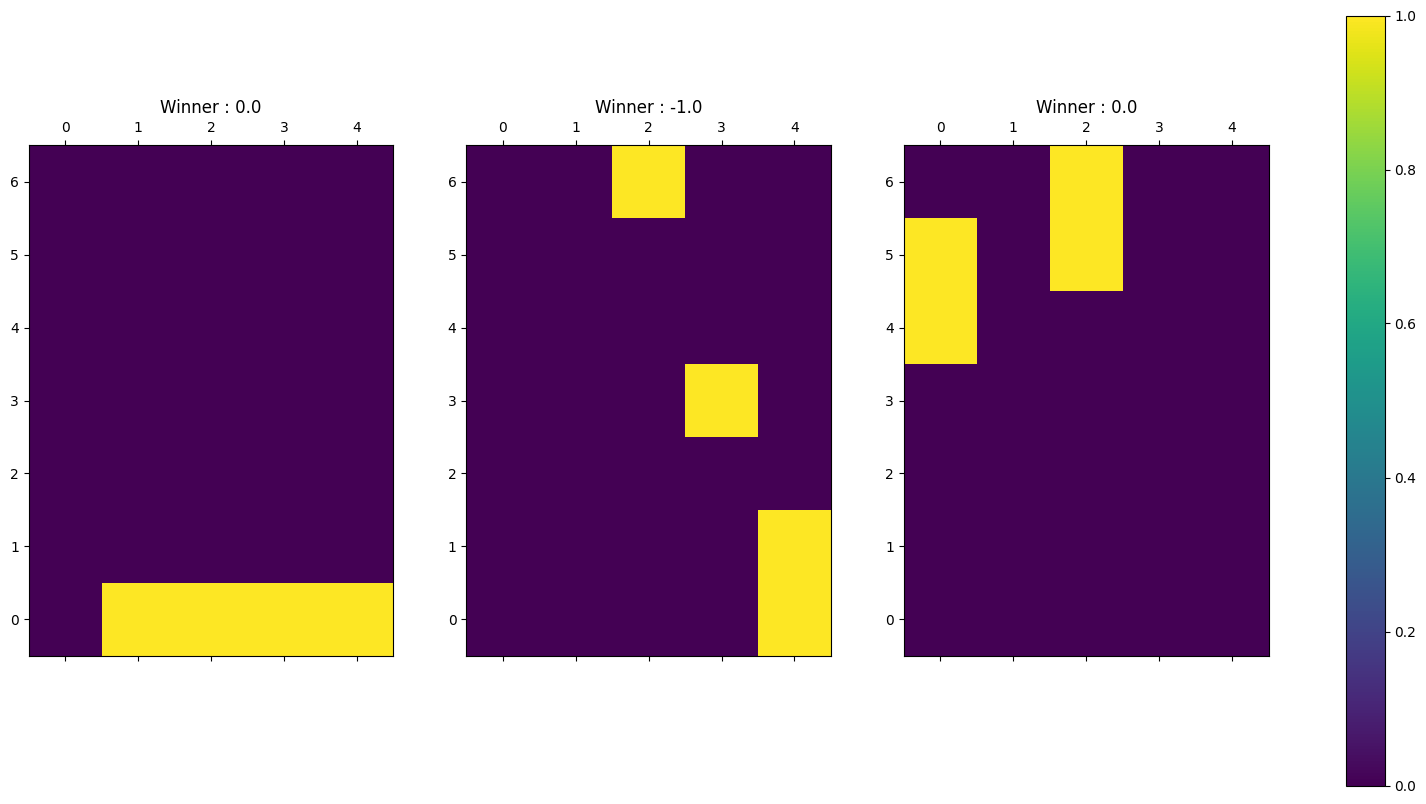

In [114]:
afew = 3 # Number of games to sample
fig, axis = plt.subplots(1,afew,figsize=(20,10)) # Generate a new figure with one row of `afew` plots. We also set the size 20,10
for i in range(afew):
    ind = np.random.randint(x_labyrinth.shape[0]) # sample a game
    ax = axis[i] # get the corresponding axis to use
    img = ax.matshow(x_labyrinth[ind].T) # Show the matrix as an image (With .T, we transpose the width dimension and the height dimension to see the game as plotted by the PyRat software.)
    ax.set_title('Winner : {}'.format(Y[ind])) # Set the axis title with the game winner

#Invert all of the y axis so that we see the game in the same direction than in the Pyrat software 
[ax.invert_yaxis() for ax in axis]

fig.colorbar(img,ax=axis) # add a colorbar for each image

In the plots above, the cheeses (1) are pictured in yellow, while the empty squares are represented in blue.

# Exercise

Now with all the knowledge you acquired today you can start doing some analysis. 

Compute the average initial configuration of the game for each situation (rat win, draw, python win) and plotting them side by side. 

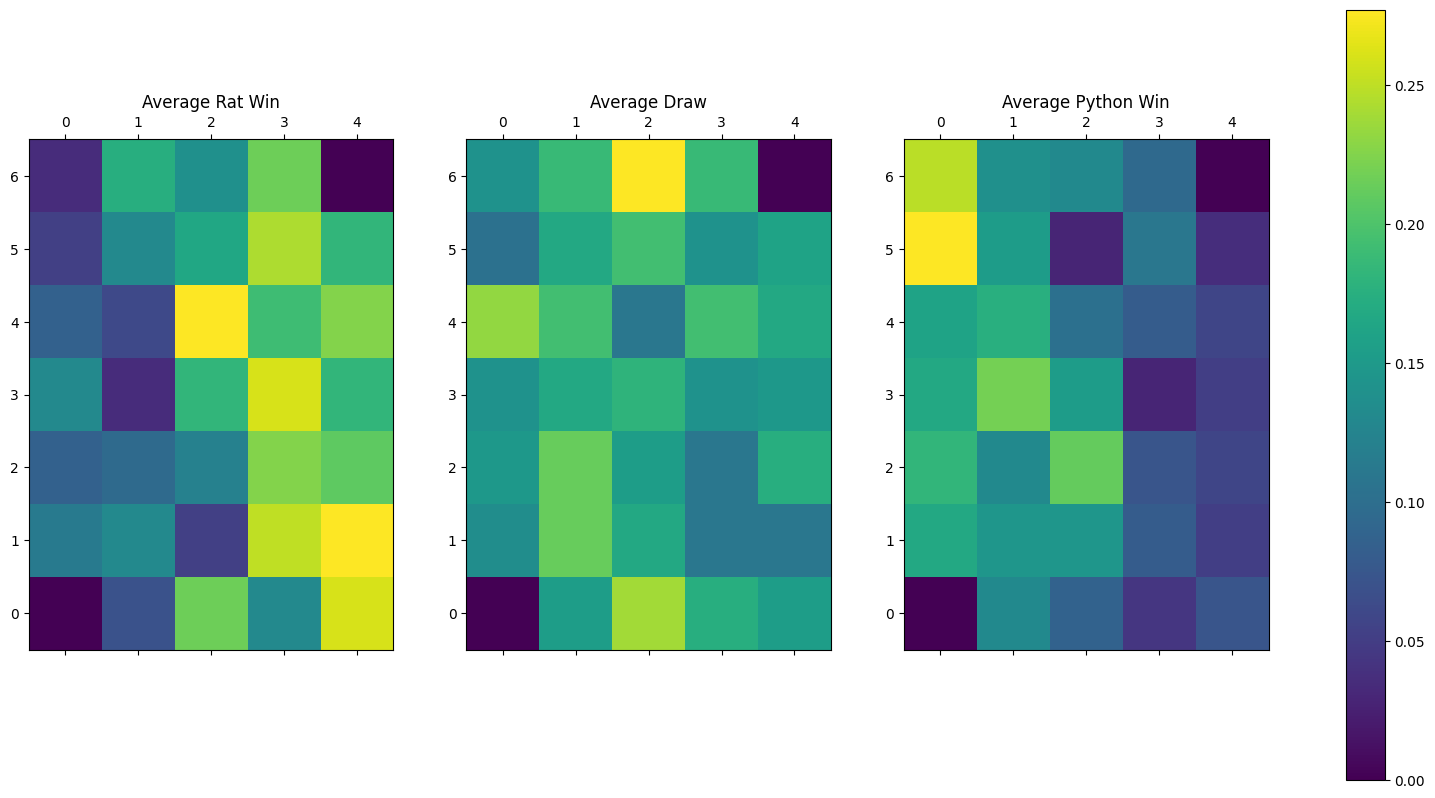

In [124]:
### CELL TO BE COMPLETED 

# Separate the data into three categories based on the winner
rat_win = x_labyrinth[Y == -1]
draw = x_labyrinth[Y == 0]
python_win = x_labyrinth[Y == 1]

# Calculate the average initial configuration for each category
avg_rat_win = np.mean(rat_win, axis=0)
avg_draw = np.mean(draw, axis=0)
avg_python_win = np.mean(python_win, axis=0)

# Plot the average initial configuration for each category
fig, axis = plt.subplots(1, 3, figsize=(20, 10))

ax = axis[0]
img = ax.matshow(avg_rat_win.T)
ax.set_title('Average Rat Win')

ax = axis[1]
img = ax.matshow(avg_draw.T)
ax.set_title('Average Draw')

ax = axis[2]
img = ax.matshow(avg_python_win.T)
ax.set_title('Average Python Win')

[ax.invert_yaxis() for ax in axis]

fig.colorbar(img, ax=axis)


In [123]:
### CELL TO BE COMPLETED 